<a href="https://colab.research.google.com/github/ibonetc/IA_Pregrado_-2025/blob/main/ML_Example_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
## Algoritmos de clasificación en Python

scikit-learn es el paquete más conocido de Python para algoritmos de machine learning.

Este tiene incluida algunas bases de datos para probar los algoritmos.

Las bases incluidas en este paquete son objetos de tipo diccionario.

Por ejemplo, podemos utilizar la base de datos Iris que tiene inlcuida como se muestra a continuación:

In [39]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
from statistics import mean, stdev

In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### Árbol de decisión
Para utilizar un árbol de decisión importamos DecisionTreeClassifier

In [7]:
clf = tree.DecisionTreeClassifier() # criterion por defecto gini (Gini impurity), o puede ser también entropy(information gain)

In [8]:
clf_ig = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
clf = clf.fit(X, y)
clf_ig=clf_ig.fit(X,y)

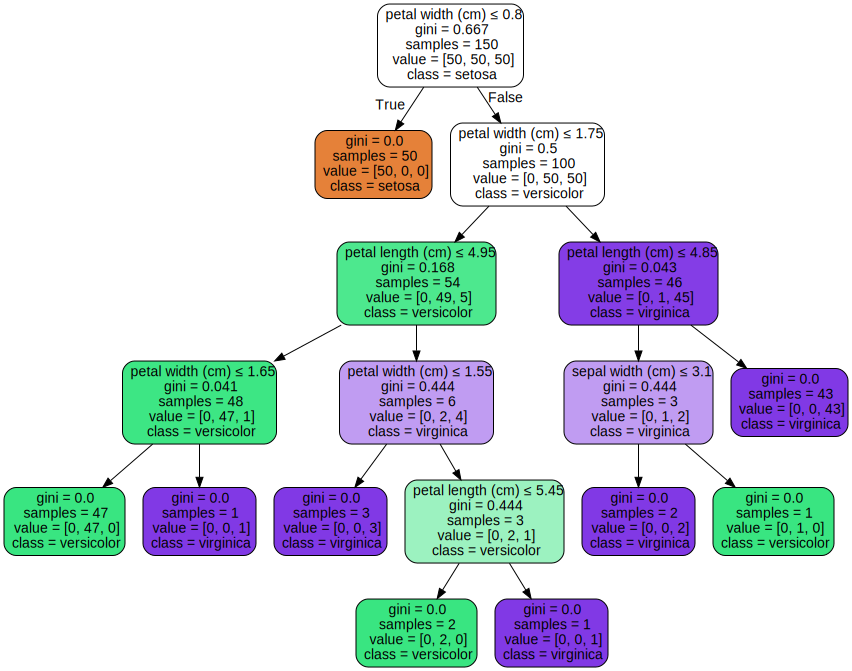

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
DT = graphviz.Source(dot_data)
DT

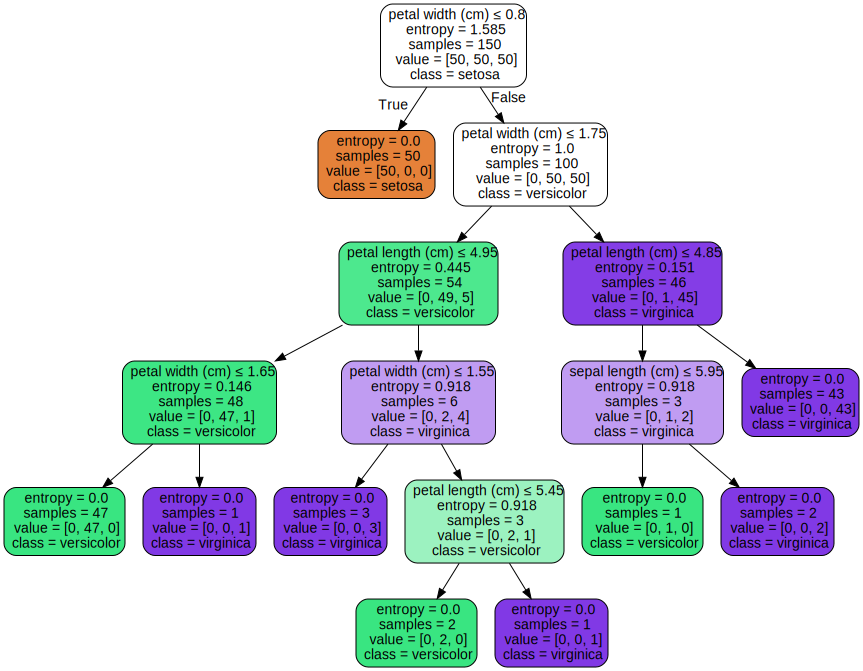

In [11]:
dot_data = tree.export_graphviz(clf_ig, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
DT = graphviz.Source(dot_data)
DT

Típicamente dividimos la base en dos conjunto, uno para entrenamiento y otro para prueba, que me permita validar el modelo.


Para esto se puede utilizar la función train_test_split que divide el conjunto en un porciento, que se le especifica, para prueba.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [14]:
print(len(X_train))
print(len(X_test))

120
30


Para ver cómo quedaron distribuidas las clases después de la partición:

In [15]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([40, 40, 40]))
(array([0, 1, 2]), array([10, 10, 10]))


In [16]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
prediction=clf.predict(X_test)
prediction

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [18]:
prediction_prob=clf.predict_proba(X_test)
prediction_prob

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

## Ajustar parámetros con validación cruzada

In [19]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 2, 3, 4, 5, 6, 8, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "ccp_alpha": [0.0, 1e-3, 1e-2]
}

In [20]:
scoring = {
    "accuracy": "accuracy",
    "precision_macro": "precision_macro",
    "recall_macro": "recall_macro",
    "f1_macro": "f1_macro"
}

In [21]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring=scoring, ##"f1_macro",
    refit="f1_macro", # poner si se ponen varios scoring
    cv=cv,
    n_jobs=-1,
    return_train_score=True
)

In [22]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='f1_macro', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro'})

In [23]:
grid.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [24]:
grid.best_score_

np.float64(0.9663367569249923)

Si quisiéramos ver no el mejor sino las 10 mejores configuraciones de parámetros

In [25]:
#cv_results = pd.DataFrame(grid.cv_results_).sort_values("mean_test_score", ascending=False)
cv_results = pd.DataFrame(grid.cv_results_).sort_values("mean_test_f1_macro", ascending=False)

In [26]:
display(cv_results.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,...,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro,split0_train_f1_macro,split1_train_f1_macro,split2_train_f1_macro,split3_train_f1_macro,split4_train_f1_macro,mean_train_f1_macro,std_train_f1_macro
496,0.002041,0.000055,0.008759,0.000049,0.01,gini,10,1,5,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",...,0.966337,0.031623,1,0.979146,0.979146,0.979146,0.979146,1.0,0.983317,0.008341
499,0.002022,0.000016,0.008939,0.000108,0.01,gini,10,2,5,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",...,0.966337,0.031623,1,0.979146,0.979146,0.979146,0.979146,1.0,0.983317,0.008341
497,0.002030,0.000016,0.009126,0.000600,0.01,gini,10,1,10,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",...,0.966337,0.031623,1,0.979146,0.979146,0.958293,0.979146,1.0,0.979146,0.013189
491,0.002012,0.000021,0.008786,0.000154,0.01,gini,8,2,10,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",...,0.966337,0.031623,1,0.979146,0.979146,0.958293,0.979146,1.0,0.979146,0.013189
490,0.001993,0.000022,0.008862,0.000095,0.01,gini,8,2,5,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",...,0.966337,0.031623,1,0.979146,0.979146,0.979146,0.979146,1.0,0.983317,0.008341
500,0.003615,0.002483,0.012964,0.003764,0.01,gini,10,2,10,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",...,0.966337,0.031623,1,0.979146,0.979146,0.958293,0.979146,1.0,0.979146,0.013189
498,0.002065,0.000078,0.009005,0.000095,0.01,gini,10,2,2,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",...,0.966337,0.031623,1,0.979146,0.979146,0.979146,0.979146,1.0,0.983317,0.008341
460,0.004178,0.002914,0.016741,0.001663,0.01,gini,4,1,5,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",...,0.966337,0.031623,1,0.979146,0.979146,0.979146,0.979146,1.0,0.983317,0.008341
453,0.002558,0.000996,0.011415,0.002719,0.01,gini,3,2,2,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",...,0.966337,0.031623,1,0.979146,0.979146,0.958293,0.979146,1.0,0.979146,0.013189
472,0.002968,0.002058,0.016218,0.005244,0.01,gini,5,2,5,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",...,0.966337,0.031623,1,0.979146,0.979146,0.979146,0.979146,1.0,0.983317,0.008341


In [27]:
best_clf = grid.best_estimator_
y_train_pred = cross_val_predict(best_clf, X_train, y_train, cv=cv, n_jobs=-1)

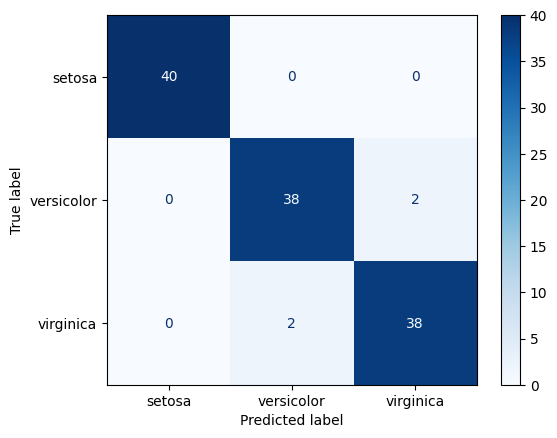

In [28]:
cm_val = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=iris.target_names).plot(cmap=plt.cm.Blues)

In [29]:
print(classification_report(y_train, y_train_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.95      0.95        40
   virginica       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



## Validación cruzada con KFold

In [37]:
grid.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [38]:
clf_dt=tree.DecisionTreeClassifier(ccp_alpha=0.01,max_depth=None,min_samples_leaf=1,min_samples_split=5)

In [40]:
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
for train_index, test_index in kfold:
  clf_dt=tree.DecisionTreeClassifier(ccp_alpha=0.01,max_depth=None,min_samples_leaf=1,min_samples_split=5)
  X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
  y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
  clf_dt.fit(X_train_cv, y_train_cv)
  scores.append(clf_dt.score(X_test_cv,y_test_cv))
accuracy=mean(scores)*100
accuracy

96.66666666666667

## ** Completar las otras métricas...**
Guarde además la predicción de cada caso y el valor real para hacer una matriz que represente la validación cruzada.

## Reentrenar todo el modelo

In [30]:
best_clf.fit(X_train, y_train)
y_test_pred = best_clf.predict(X_test)

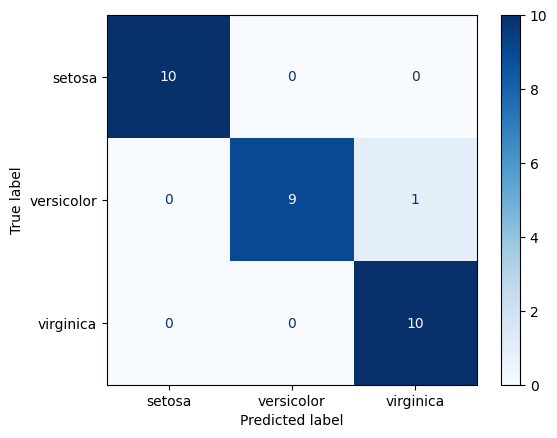

In [31]:
cm_val = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=iris.target_names).plot(cmap=plt.cm.Blues)

In [32]:
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



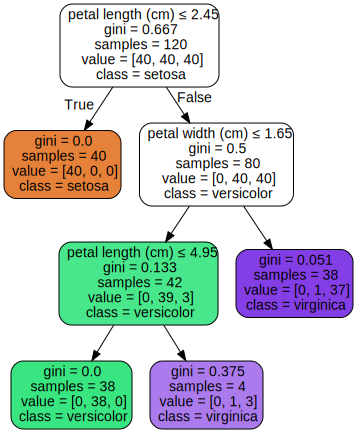

In [33]:
dot_data = tree.export_graphviz(best_clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
DT = graphviz.Source(dot_data)
DT